In [1]:
#import duckdb
#import sqlite3
#import ipywidgets

#con = sqlite3.connect("olist.db")

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///olist.db

Connecting to 'sqlite:///olist.db'

In [4]:
%%sql

SELECT *
FROM sellers;

Running query in 'sqlite:///olist.db'

index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [5]:
%%sql

SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';

Running query in 'sqlite:///olist.db'

name
customers
geoloc
order_items
order_pymts
order_reviews
orders
products
sellers
translation


In [6]:
%%sql

SELECT *
FROM customers
LIMIT 0;

Running query in 'sqlite:///olist.db'

index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [7]:
%%sql

SELECT *
FROM orders
LIMIT 0;

Running query in 'sqlite:///olist.db'

index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [8]:
%%sql

SELECT *
FROM order_items
LIMIT 0;

Running query in 'sqlite:///olist.db'

index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [9]:
%%sql

SELECT *
FROM sellers
LIMIT 0;

Running query in 'sqlite:///olist.db'

index,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [10]:
%%sql

SELECT *
FROM order_reviews
LIMIT 0;

Running query in 'sqlite:///olist.db'

index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [11]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

# 1. En excluant les commandes annulées, quelles sont les commandes récentes de moins de 3 mois que les clients ont reçues avec au moins 3 jours de retard ?

In [12]:
%%sql

SELECT *
FROM orders
LIMIT 0;

Running query in 'sqlite:///olist.db'

index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [13]:
%%sql


SELECT order_id, JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_estimated_delivery_date) AS days_late
FROM orders
WHERE order_status != 'canceled'
AND order_purchase_timestamp >= '2018-06-01'
AND days_late >= 3
ORDER BY days_late DESC;

Running query in 'sqlite:///olist.db'

order_id,days_late
7e708aed151d6a8601ce8f2eaa712bf4,96.5574768516235
0096668e5b0b8e9657a6f7209a4e58b4,60.61303240759298
7797e37c568b84182c813b9b2492b384,58.66086805565283
a81c8b86774acbd8736ec06f26772f41,58.496354166883975
ae213a9f84c777fb7a31e8c0f09fd30c,50.657395833171904
b2997e1d7061605e9285496c581d1fbd,49.013078703545034
f23681a0fffdb8051c674707c7e912ef,46.990613426081836
4530ebf341c28451b56c66fc4d70f8eb,43.754745370242745
a2b4be96b53022618030c17ed437604d,41.10038194432855
4af2fb154881f350d8696f7f7a7f80d3,38.67260416643694


In [15]:
import pandas as pd

df = pd.DataFrame(Out[13])
df.head()

,order_id,days_late
0,7e708aed151d6a8601ce8f2eaa712bf4,96.557477
1,0096668e5b0b8e9657a6f7209a4e58b4,60.613032
2,7797e37c568b84182c813b9b2492b384,58.660868
3,a81c8b86774acbd8736ec06f26772f41,58.496354
4,ae213a9f84c777fb7a31e8c0f09fd30c,50.657396


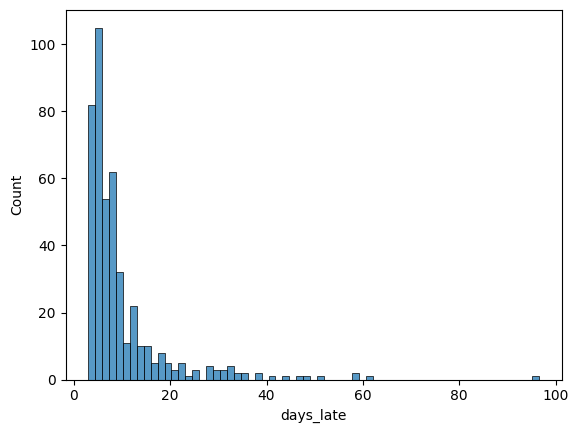

In [16]:
import seaborn as sns

sns.histplot(data=df, x='days_late');

In [17]:
df.shape

(447, 2)

# 2. Qui sont les vendeurs ayant généré un chiffre d'affaires de plus de 100 000 Real sur des commandes livrées via Olist 

In [18]:
%%sql

SELECT seller_id, ROUND(SUM(price)) AS total_price
FROM order_items
GROUP BY seller_id
HAVING total_price >= 100000
ORDER BY total_price DESC;

Running query in 'sqlite:///olist.db'

seller_id,total_price
4869f7a5dfa277a7dca6462dcf3b52b2,229473.0
53243585a1d6dc2643021fd1853d8905,222776.0
4a3ca9315b744ce9f8e9374361493884,200473.0
fa1c13f2614d7b5c4749cbc52fecda94,194042.0
7c67e1448b00f6e969d365cea6b010ab,187924.0
7e93a43ef30c4f03f38b393420bc753a,176432.0
da8622b14eb17ae2831f4ac5b9dab84a,160237.0
7a67c85e85bb2ce8582c35f2203ad736,141746.0
1025f0e2d44d7041d6cf58b6550e0bfa,138969.0
955fee9216a65b617aa5c0531780ce60,135172.0


# 3. Qui sont les nouveaux vendeurs (moins de 3 mois d'ancienneté) qui sont déjà très engagés avec la plateforme (ayant déjà vendu plus de 30 produits)?

In [19]:
%%sql
WITH old_sellers AS (
    SELECT seller_id
    FROM order_items
    WHERE shipping_limit_date < '2018-06-01'
)


SELECT seller_id, COUNT(seller_id) AS product_sold
FROM order_items
WHERE shipping_limit_date > '2018-06-01'
AND seller_id NOT IN (SELECT seller_id FROM old_sellers)
GROUP BY seller_id
HAVING product_sold >= 30
ORDER BY product_sold DESC;

Running query in 'sqlite:///olist.db'

seller_id,product_sold
612170e34b97004b3ba37eae81836b4c,110
d13e50eaa47b4cbe9eb81465865d8cfc,69
beadbee30901a7f61d031b6b686095ad,68
c9aafcd0621b2207c10e32c649cada4d,52
81f89e42267213cb94da7ddc301651da,52
6b90f847357d8981edd79a1eb1bf0acb,47
3ab971ce71839580d2ae5b4e40fe8044,38
31561f325664a8a7aba4c8d0c3a9b3db,38
240b9776d844d37535668549a396af32,36
18e694e0e48ed6f7aa3f24aade5fd697,34


# 4. Quels sont les 5 codes postaux, enregistrant plus de 30 commandes, avec le pire review score moyen sur les 12 derniers mois ?

In [21]:
%%sql
SELECT MAX(review_creation_date)
FROM order_reviews
LIMIT 1;

Running query in 'sqlite:///olist.db'

MAX(review_creation_date)
2018-08-31 00:00:00


In [23]:
%%sql

SELECT AVG(review_score), AS mean_score, COUNT(order_id) AS total_order, customer_zip_code_prefix
FROM order_reviews
JOIN orders USING(order_id)
JOIN customers USING(customer_id)
WHERE review_creation_date >= '2017-09-01'
GROUP BY customer_zip_code_prefix
HAVING total_order >= 30
ORDER BY mean_score ASC
LIMIT 5;

Running query in 'sqlite:///olist.db'

mean_score,total_order,customer_zip_code_prefix
2.87,53,22753
3.0,31,22723
3.06,31,28893
3.18,38,22770
3.23,30,22621
